# <center><p style ="color: gold; font-weight: 500">House Prices competition</p></center>

<center>>>> Nguyễn Ngọc Trí Vĩ <<<

Link competitions: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error


### Import and preprocess data

In [11]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

##### Visualization train set

In [13]:
train_df.select_dtypes(include=["float", 'int'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,65.0,-0.207142,1,1,3,3,4,0,...,0.0,0.0,3,4,1,-0.087688,2,8,8,4
1,0,3,80.0,-0.091886,1,1,3,3,2,0,...,0.0,0.0,3,4,1,-0.087688,5,7,8,4
2,5,3,68.0,0.073480,1,1,0,3,4,0,...,0.0,0.0,3,4,1,-0.087688,9,8,8,4
3,6,3,60.0,-0.096897,1,1,0,3,0,0,...,0.0,0.0,3,4,1,-0.087688,2,6,8,0
4,5,3,84.0,0.375148,1,1,0,3,2,0,...,0.0,0.0,3,4,1,-0.087688,12,8,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,-0.260560,1,1,3,3,4,0,...,0.0,0.0,3,4,1,-0.087688,8,7,8,4
1456,0,3,85.0,0.266407,1,1,3,3,4,0,...,0.0,0.0,3,2,1,-0.087688,2,10,8,4
1457,6,3,66.0,-0.147810,1,1,3,3,4,0,...,0.0,0.0,3,0,3,4.953112,5,10,8,4
1458,0,3,68.0,-0.080160,1,1,3,3,4,0,...,0.0,0.0,3,4,1,-0.087688,4,10,8,4


In [5]:
train_df.select_dtypes(exclude=["float", 'int'])

""
0
1
2
3
4
...
1455
1456
1457
1458


In [64]:
pd.DataFrame(train_df.isnull().sum()).loc[(pd.DataFrame(train_df.isnull().sum())!=0).any(axis=1)]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


##### Visualization test set

In [66]:
test_df.select_dtypes(include=["float", 'int'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [67]:
test_df.select_dtypes(exclude=["float", 'int'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [68]:
pd.DataFrame(test_df.isnull().sum()).loc[(pd.DataFrame(test_df.isnull().sum())!=0).any(axis=1)]

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


#### Preprocessing train and test set

-   Fill NaN value
-   Label encoder (hashing data)
-   Combine 'YearBuilt' and 'YearRemodAdd', 'BsmtFullBath' and 'BsmtHalfBath', 'GrLivArea' and 'TotalBsmtSF'
-   Drop useless attributes

In [12]:
#Fill null value for train set
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace= True)
train_df['Alley'].fillna("None", inplace=True)
train_df['MasVnrType'].fillna("None", inplace=True)
train_df['MasVnrArea'].fillna(0, inplace=True)
train_df['BsmtQual'].fillna("None", inplace=True)
train_df['BsmtCond'].fillna("None", inplace=True)
train_df['BsmtExposure'].fillna("None", inplace=True)
train_df['BsmtFinType1'].fillna("None", inplace=True)
train_df['BsmtFinType2'].fillna("None", inplace=True)
train_df['Electrical'].fillna("Mix", inplace=True)
train_df['FireplaceQu'].fillna("None", inplace=True)
train_df['GarageType'].fillna("None", inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].min(), inplace=True)
train_df['GarageFinish'].fillna("None", inplace=True)
train_df['GarageQual'].fillna("None", inplace=True)
train_df['GarageCond'].fillna("None", inplace=True)
train_df['PoolQC'].fillna("None", inplace=True)
train_df['Fence'].fillna("None", inplace=True)
train_df['MiscFeature'].fillna("None", inplace=True)


#Fill null value for test set
test_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace= True)
test_df['KitchenQual'].fillna("TA", inplace=True)
test_df['Alley'].fillna("None", inplace=True)
test_df['MasVnrType'].fillna("None", inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)
test_df['BsmtQual'].fillna("None", inplace=True)
test_df['BsmtCond'].fillna("None", inplace=True)
test_df['BsmtExposure'].fillna("None", inplace=True)
test_df['BsmtFinType1'].fillna("None", inplace=True)
test_df['BsmtFinType2'].fillna("None", inplace=True)
test_df['Electrical'].fillna("Mix", inplace=True)
test_df['FireplaceQu'].fillna("None", inplace=True)
test_df['GarageType'].fillna("None", inplace=True)
test_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].min(), inplace=True)
test_df['GarageFinish'].fillna("None", inplace=True)
test_df['GarageQual'].fillna("None", inplace=True)
test_df['GarageCond'].fillna("None", inplace=True)
test_df['PoolQC'].fillna("None", inplace=True)
test_df['Fence'].fillna("None", inplace=True)
test_df['MiscFeature'].fillna("None", inplace=True)
test_df['MSZoning'].fillna("RL", inplace=True)
test_df['Exterior1st'].fillna("VinylSd", inplace=True)
test_df['Exterior2nd'].fillna("VinylSd", inplace=True)
test_df['BsmtFinSF1'].fillna(train_df['BsmtFinSF1'].mean(), inplace=True)
test_df['BsmtFinSF2'].fillna(train_df['BsmtFinSF2'].mean(), inplace=True)
test_df['BsmtUnfSF'].fillna(train_df['BsmtUnfSF'].mean(), inplace=True)
test_df['TotalBsmtSF'].fillna(train_df['TotalBsmtSF'].mean(), inplace=True)
test_df['BsmtFullBath'].fillna(1.0, inplace=True)
test_df['BsmtHalfBath'].fillna(0, inplace=True)
test_df['Functional'].fillna("Typ", inplace=True)
test_df['GarageCars'].fillna(0, inplace=True)
test_df['GarageArea'].fillna(0, inplace=True)
test_df['SaleType'].fillna("Oth", inplace=True)



#Encode label for train set and test set
columns_to_encode = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
                     'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                     'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                     'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                     'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for column in columns_to_encode:
    label_encoder = LabelEncoder()
    label_encoder.fit(pd.concat([train_df[column], test_df[column]]))
    train_df[column] = label_encoder.transform(train_df[column])
    test_df[column] = label_encoder.transform(test_df[column])


#Combine 'YearBuilt' and 'YearRemodAdd', 'BsmtFullBath' and 'BsmtHalfBath', 'GrLivArea' and 'TotalBsmtSF' of train set and test set
train_df['YearRemodAdd'] = 2023 - train_df['YearRemodAdd']
train_df = train_df.rename(columns={'YearRemodAdd': "YearLastRemodel"})

test_df['YearRemodAdd'] = 2023 - test_df['YearRemodAdd']
test_df = test_df.rename(columns={'YearRemodAdd': "YearLastRemodel"})


train_df['BsmtFullBath'] = train_df["BsmtFullBath"] + (train_df["BsmtHalfBath"]*0.5) + train_df["FullBath"] + (train_df["HalfBath"]*0.5)
train_df = train_df.rename(columns={'BsmtFullBath': "NumberBathroom"})

test_df['BsmtFullBath'] = test_df["BsmtFullBath"] + (test_df["BsmtHalfBath"]*0.5) + test_df["FullBath"] + (test_df["HalfBath"]*0.5)
test_df = test_df.rename(columns={'BsmtFullBath': "NumberBathroom"})


train_df['TotalBsmtSF'] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
train_df = train_df.rename(columns={'TotalBsmtSF': "TotalArea"})

test_df['TotalBsmtSF'] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]
test_df = test_df.rename(columns={'TotalBsmtSF': "TotalArea"})



#Scale data for train set and test set
columns_to_stdscale = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalArea', 'MiscVal', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
                    'LowQualFinSF', 'GarageArea', 'EnclosedPorch', 'MiscVal']

for column in columns_to_stdscale:
    scale = StandardScaler()
    scale.fit(train_df[[column]])
    train_df[column] = scale.transform(train_df[[column]])
    test_df[column] = scale.transform(test_df[[column]])


columns_to_mmscale = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

for column in columns_to_mmscale:
    scale = MinMaxScaler()
    scale.fit(train_df[[column]])
    train_df[column] = scale.transform(train_df[[column]])
    test_df[column] = scale.transform(test_df[[column]])

train_df['GarageYrBlt'] = train_df['GarageYrBlt'] - 1895
train_df['YrSold'] = train_df['YrSold'] - 2000

test_df['GarageYrBlt'] = test_df['GarageYrBlt'] - 1895
test_df['YrSold'] = test_df['YrSold'] - 2000


#Get train target and test Id
train_target = train_df['SalePrice']
Id = test_df['Id']

#Drop useless columns
train_df = train_df.drop(columns=['YearBuilt', 'Utilities', 'Id', 'SalePrice', 'GrLivArea', 'FullBath', 'BsmtHalfBath', 'HalfBath'])
test_df = test_df.drop(columns=['YearBuilt', 'Utilities', 'Id', 'GrLivArea', 'FullBath', 'BsmtHalfBath', 'HalfBath'])

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>],
       [<Axes: title={'center': 'Alley'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'LotConfig'}>,
        <Axes: title={'center': 'LandSlope'}>],
       [<Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearLastRemodel'}>,
        <Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>],
       [<Axes: title={'center': 'Exterior1st'}>,

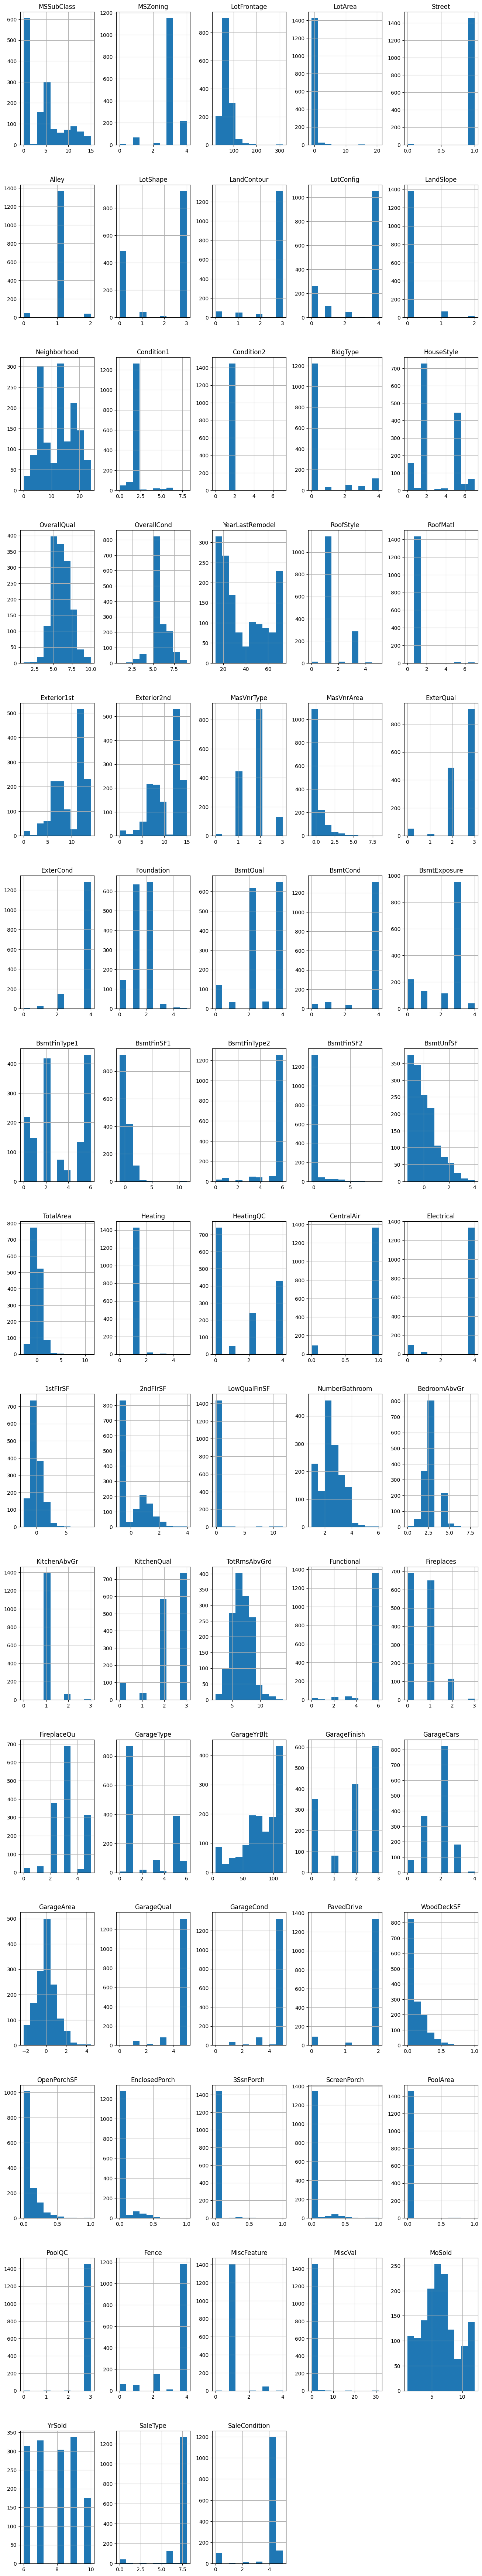

In [13]:
train_df.hist(figsize = (16,114), layout = (19,5))

### Initialize, train model and predict

#### XGBoost

Finetune

In [ ]:
# grid search
model = XGBRegressor()
n_estimators = [210, 220, 230, 240]
learning_rate = [0.173, 0.175, 0.177]
param_grid = dict(max_depth=[3], n_estimators=n_estimators, learning_rate = learning_rate)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose=1)
grid_result = grid_search.fit(train_df,train_target)

# summarize results
print("Best result using: %s" % (grid_result.best_params_))

Predict

In [4]:
model = XGBRegressor(max_depth=3, n_estimators=210, learning_rate = 0.175)
model.fit(train_df,train_target)

predict_test = model.predict(test_df)

print('Train error: ', np.sqrt(mean_squared_error(train_target, model.predict(train_df))))

output = pd.DataFrame({'Id': Id, 'SalePrice': predict_test})
output.to_csv('submission.csv', index=False)

Train error:  9000.742295275713
